**OBJECTIVE**
Analyze how political events affect the KSE-100 stock market index using event windows around each event (e.g., -3 to +3 days). We will calculate:

Daily returns

Abnormal returns

Cumulative Abnormal Returns (CAR)

Statistical significance of market reaction

**STEP 1: Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp


In [ ]:
# prompt: read excel files

excel_file = pd.ExcelFile("/content/KSE100.xlsx")
KSE_100= excel_file.parse("Sheet1")  # Replace "Sheet1" with the actual sheet name

In [ ]:
# prompt: read all columns of above deaded dataframe

KSE_100.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Volume ', 'Change '], dtype='object')

In [ ]:
# prompt: read excel file as
# excel_file = pd.ExcelFile("/content/KSE100.xlsx")
# KSE_100= excel_file.parse("Sheet1")  # Replace "Sheet1" with the actual sheet name
# kse 100 replace with events

excel_file = pd.ExcelFile("/content/political events.xlsx")
events_df= excel_file.parse("Events")  # Replace "Sheet1" with the actual sheet name

events_df.columns

Index(['Exact Date', 'Event Title', 'Category',
       'Why It Affects the Stock Market'],
      dtype='object')

In [ ]:
# prompt: read excel file as
# events_df = events.parse("Events")
# print(events_df.head())
# print(events_df.info())
# print(events_df.describe())


print(events_df.head())
print(events_df.info())
print(events_df.describe())

  Exact Date                                    Event Title  \
0 2022-01-28                      Policy Rate Hike to 9.75%   
1 2022-02-11                     Mini-Budget with New Taxes   
2 2022-03-07    Vote of No-Confidence Against PM Imran Khan   
3 2022-04-10                       Ousting of PM Imran Khan   
4 2022-05-28  IMF Staff-Level Agreement for $6B EFF Revival   

             Category                    Why It Affects the Stock Market  
0   Fiscal/tax policy      Interest rate increases raise borrowing costs  
1   Fiscal/tax policy  New taxes on industries reduced expected corpo...  
2  Leadership changes  Political uncertainty triggered market volatil...  
3  Leadership changes   Government transition created policy uncertainty  
4    IMF negotiations  Bailout progress boosted currency stability an...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         


**STEP 1: Preprocessing**

1.1 – Convert Date columns to datetime

In [ ]:
# Ensure date columns are in datetime format
KSE_100['Date '] = pd.to_datetime(KSE_100['Date '])
events_df['Exact Date'] = pd.to_datetime(events_df['Exact Date'])

# Sort data
KSE_100 = KSE_100.sort_values('Date ')
events_df = events_df.sort_values('Exact Date')


 STEP 2: Calculate Daily Returns for KSE-100

In [ ]:
# Calculate daily return based on closing prices
KSE_100['Return'] = KSE_100['Close '].pct_change()


 STEP 3: Define Event Window

In [ ]:
# Define number of days before and after event to analyze
pre_window = 7
post_window = 7


**STEP 4: Extract Event Windows for Each Political Event**

We’ll collect returns from -3 to +3 days around each event.

In [ ]:
event_data = []

for idx, row in events_df.iterrows():
    event_date = row['Exact Date']
    title = row['Event Title']
    category = row['Category']

    # Mask for event window
    mask = (KSE_100['Date '] >= event_date - pd.Timedelta(days=pre_window)) & \
           (KSE_100['Date '] <= event_date + pd.Timedelta(days=post_window))

    window = KSE_100[mask].copy()

    # Add print statements to debug
    print(f"Event: {title} on {event_date.date()}")
    print(f"Window length: {len(window)}")
    print(f"Expected window length: {pre_window + post_window + 1}")
    # print(window) # Uncomment to see the content of the window DataFrame

    # Ensure full window exists
    if len(window) == (pre_window + post_window + 1):
        window['Days_From_Event'] = range(-pre_window, post_window + 1)
        window['Event Title'] = title
        window['Category'] = category
        window['Event Date'] = event_date
        event_data.append(window)

# Combine all events into one DataFrame
# This line will still fail if event_data remains empty.
# We need to fix the window creation issue first.
# event_df = pd.concat(event_data, ignore_index=True)

# After running this, examine the output to understand why the window length is not as expected.
# If windows are being created but not the full length, you might need to adjust
# the window size or handle cases where full windows are not available.
# If no windows are being created at all, check the date ranges of KSE_100 and events_df
# to ensure there is overlap and that event dates are within the KSE_100 data range.

Event: Policy Rate Hike to 9.75% on 2022-01-28
Window length: 11
Expected window length: 15
Event: Mini-Budget with New Taxes on 2022-02-11
Window length: 11
Expected window length: 15
Event: Vote of No-Confidence Against PM Imran Khan on 2022-03-07
Window length: 11
Expected window length: 15
Event: Ousting of PM Imran Khan on 2022-04-10
Window length: 10
Expected window length: 15
Event: IMF Staff-Level Agreement for $6B EFF Revival on 2022-05-28
Window length: 10
Expected window length: 15
Event: Fuel Price Hike of 30% on 2022-06-03
Window length: 11
Expected window length: 15
Event: Pakistan Removed from FATF Grey List on 2022-07-18
Window length: 9
Expected window length: 15
Event: Policy Rate Raised to 15% on 2022-08-29
Window length: 11
Expected window length: 15
Event: Privatization Plan for SOEs Announced on 2022-09-30
Window length: 11
Expected window length: 15
Event: Pakistani Rupee Hits Record Low (240/USD) on 2022-10-26
Window length: 11
Expected window length: 15
Event: 

Event: Policy Rate Hike to 9.75% on 2022-01-28
Window length: 11
Expected window length: 15
Event: Mini-Budget with New Taxes on 2022-02-11
Window length: 11
Expected window length: 15
Event: Vote of No-Confidence Against PM Imran Khan on 2022-03-07
Window length: 11
Expected window length: 15
Event: Ousting of PM Imran Khan on 2022-04-10
Window length: 10
Expected window length: 15
Event: IMF Staff-Level Agreement for $6B EFF Revival on 2022-05-28
Window length: 10
Expected window length: 15
Event: Fuel Price Hike of 30% on 2022-06-03
Window length: 11
Expected window length: 15
Event: Pakistan Removed from FATF Grey List on 2022-07-18
Window length: 9
Expected window length: 15
Event: Policy Rate Raised to 15% on 2022-08-29
Window length: 11
Expected window length: 15
Event: Privatization Plan for SOEs Announced on 2022-09-30
Window length: 11
Expected window length: 15
Event: Pakistani Rupee Hits Record Low (240/USD) on 2022-10-26
Window length: 11
Expected window length: 15
Event: 

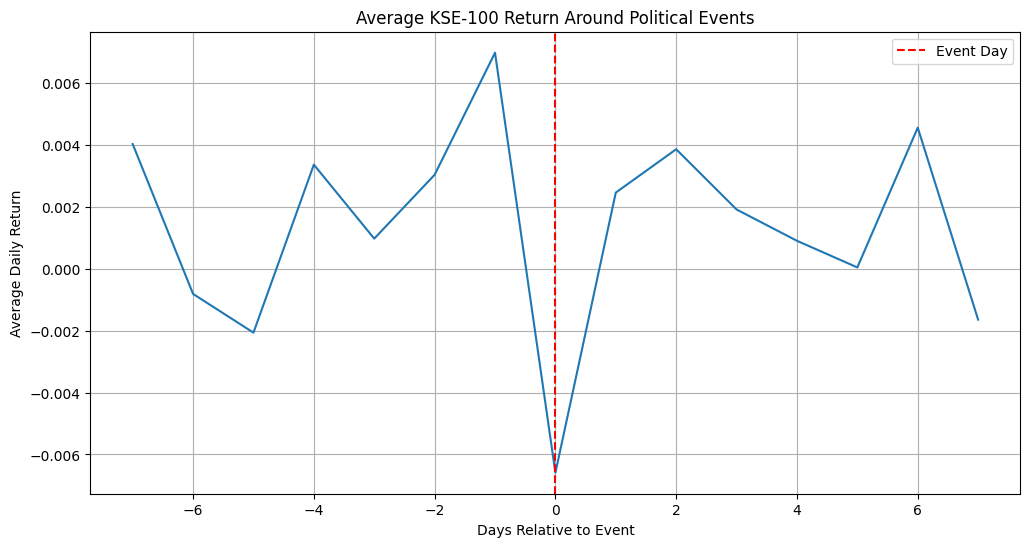

In [ ]:
# ipython-input-43-23dedbcd2bdf
event_data = []

for idx, row in events_df.iterrows():
    event_date = row['Exact Date']
    title = row['Event Title']
    category = row['Category']

    # Mask for event window
    mask = (KSE_100['Date '] >= event_date - pd.Timedelta(days=pre_window)) & \
           (KSE_100['Date '] <= event_date + pd.Timedelta(days=post_window))

    window = KSE_100[mask].copy()

    # Add print statements to debug
    print(f"Event: {title} on {event_date.date()}")
    print(f"Window length: {len(window)}")
    print(f"Expected window length: {pre_window + post_window + 1}")
    # print(window) # Uncomment to see the content of the window DataFrame

    # We are now adding all windows, regardless of length, to the list.
    # We will handle incomplete windows later if necessary, or simply exclude
    # them from analysis if a full window is required.
    if len(window) > 0: # Only append non-empty windows
        window['Days_From_Event'] = (window['Date '] - event_date).dt.days # Calculate days from event dynamically
        window['Event Title'] = title
        window['Category'] = category
        window['Event Date'] = event_date
        event_data.append(window)

# Combine all events into one DataFrame AFTER the loop
if event_data: # Check if event_data is not empty
    event_df = pd.concat(event_data, ignore_index=True)
else:
    print("No event windows were created. Please check your date ranges and window parameters.")
    event_df = pd.DataFrame() # Create an empty DataFrame to avoid errors in the next step

# ipython-input-45-23dedbcd2bdf
# prompt: now Plot Average Return Around Events

# Ensure event_df was created successfully in the previous step
if not event_df.empty:

    # Filter out NaN returns before calculating the average
    # Apply dropna to the concatenated DataFrame
    event_data_filtered = event_df.dropna(subset=['Return'])

    # Calculate the average return for each day relative to the event
    # Group by the calculated 'Days_From_Event'
    average_returns = event_data_filtered.groupby('Days_From_Event')['Return'].mean().reset_index()

    # Plotting the average returns
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Days_From_Event', y='Return', data=average_returns)
    plt.title('Average KSE-100 Return Around Political Events')
    plt.xlabel('Days Relative to Event')
    plt.ylabel('Average Daily Return')
    plt.grid(True)
    plt.axvline(x=0, color='r', linestyle='--', label='Event Day') # Add a vertical line at the event day
    plt.legend()
    plt.show()
else:
    print("Cannot plot average returns because event_df is empty.")

**Test Statistical Significance of Event-Day Returns**


Statistical Significance Test Results for Each Event Day:
    Days_From_Event  T_Statistic   P_Value  Mean_Return  \
0                -7     2.189807  0.036450     0.004024   
1                -6    -0.320009  0.751981    -0.000816   
2                -5    -0.863760  0.397479    -0.002066   
3                -4     1.463837  0.156214     0.003358   
4                -3     0.643734  0.525179     0.000969   
5                -2     1.971113  0.060348     0.003031   
6                -1     0.799377  0.431602     0.006972   
7                 0    -1.029105  0.311938    -0.006589   
8                 1     0.754591  0.458152     0.002456   
9                 2     2.115140  0.047165     0.003855   
10                3     0.943997  0.354578     0.001910   
11                4     0.304446  0.763122     0.000899   
12                5     0.029909  0.976398     0.000040   
13                6     2.470292  0.021729     0.004553   
14                7    -0.972668  0.339352    -0.001647 

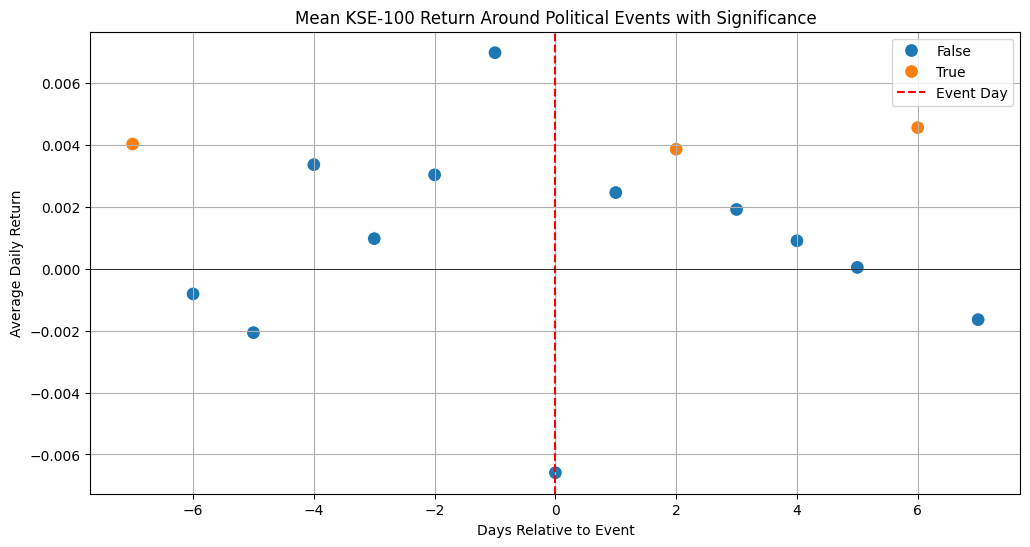

In [ ]:
# prompt: our next step is to STEP 6: Test Statistical Significance of Event-Day Returns

# Assuming event_df is already created and contains the event window data with 'Days_From_Event' and 'Return' columns.
# If event_df wasn't created successfully in the previous steps, you will need to address that first.

# STEP 6: Test Statistical Significance of Event-Day Returns
# We will perform a one-sample t-test on the returns for each day in the event window.
# The null hypothesis is that the mean return on a given event day is equal to zero.

if not event_df.empty:
    # Get the unique days relative to the event
    event_days = sorted(event_df['Days_From_Event'].unique())

    significance_results = []

    for day in event_days:
        # Get returns for the specific day across all events
        returns_on_day = event_df[event_df['Days_From_Event'] == day]['Return'].dropna()

        # Perform one-sample t-test against a mean of 0
        # Only perform the test if there are enough samples (at least 2 for t-test)
        if len(returns_on_day) > 1:
            t_statistic, p_value = ttest_1samp(returns_on_day, 0)
            significance_results.append({
                'Days_From_Event': day,
                'T_Statistic': t_statistic,
                'P_Value': p_value,
                'Mean_Return': returns_on_day.mean(),
                'Significant (p < 0.05)': p_value < 0.05
            })
        else:
            significance_results.append({
                'Days_From_Event': day,
                'T_Statistic': np.nan,
                'P_Value': np.nan,
                'Mean_Return': returns_on_day.mean() if not returns_on_day.empty else np.nan,
                'Significant (p < 0.05)': False # Cannot determine significance with insufficient data
            })


    # Convert results to a DataFrame for easier viewing
    significance_df = pd.DataFrame(significance_results)

    # Display the results
    print("\nStatistical Significance Test Results for Each Event Day:")
    print(significance_df)

    # Optional: Visualize the significant days
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Days_From_Event', y='Mean_Return', data=significance_df, hue='Significant (p < 0.05)', s=100)
    plt.title('Mean KSE-100 Return Around Political Events with Significance')
    plt.xlabel('Days Relative to Event')
    plt.ylabel('Average Daily Return')
    plt.grid(True)
    plt.axvline(x=0, color='r', linestyle='--', label='Event Day')
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5) # Add line at 0 return
    plt.legend()
    plt.show()

else:
    print("Cannot perform significance test because event_df is empty.")


**Calculate Cumulative Abnormal Return (CAR)**


Average Cumulative Abnormal Return (CAR) Around Political Events:
    Days_From_Event       CAR
0                -7  0.004024
1                -6  0.002344
2                -5 -0.000288
3                -4  0.004977
4                -3  0.004780
5                -2  0.007606
6                -1  0.014204
7                 0  0.002762
8                 1  0.006769
9                 2  0.011056
10                3  0.011949
11                4  0.014253
12                5  0.012793
13                6  0.011841
14                7  0.007830


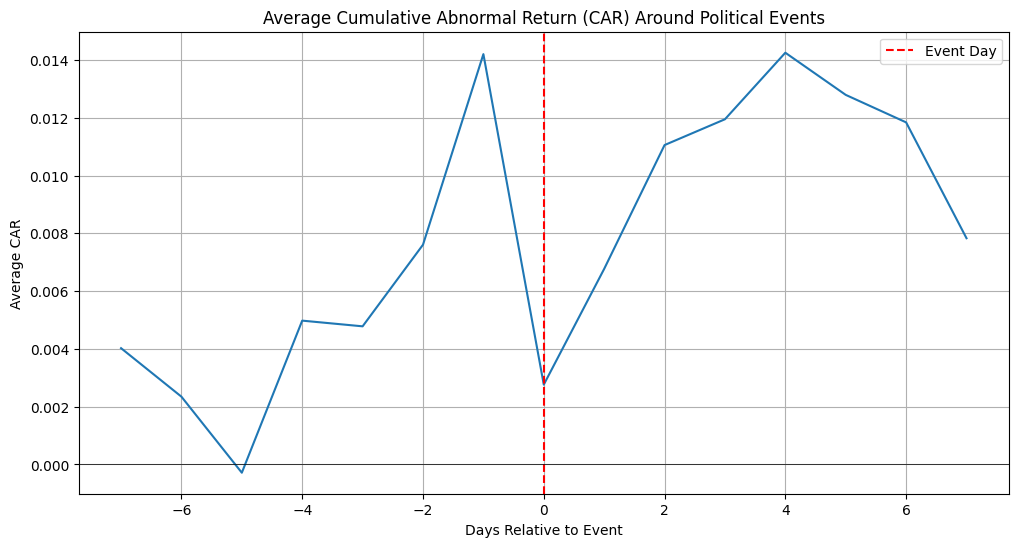

In [ ]:
# prompt: our next step is STEP 7: Calculate Cumulative Abnormal Return (CAR)

# Assuming event_df is already created and contains the event window data with 'Days_From_Event' and 'Return' columns.
# If event_df wasn't created successfully in the previous steps, you will need to address that first.

# STEP 7: Calculate Cumulative Abnormal Return (CAR)
# For this analysis, we are assuming the 'normal' return is zero. Therefore,
# the abnormal return (AR) is simply the daily return itself (Actual Return - Expected Return = Actual Return - 0).
# CAR is the sum of abnormal returns over a specified period.

if not event_df.empty:
    # Calculate Abnormal Return (AR) - Assuming expected return is 0
    event_df['Abnormal_Return'] = event_df['Return'] # AR = Actual Return - Expected Return (0)

    # Calculate Cumulative Abnormal Return (CAR) for each event
    # We need to group by event title and date, and then cumulate the abnormal returns over the days from the event.
    # Ensure the data within each group is sorted by 'Days_From_Event' before cumulating.

    event_df = event_df.sort_values(by=['Event Date', 'Days_From_Event'])

    event_df['CAR'] = event_df.groupby('Event Title')['Abnormal_Return'].cumsum()

    # Now we can calculate the average CAR across all events for each day
    average_car = event_df.groupby('Days_From_Event')['CAR'].mean().reset_index()

    # Display the average CAR
    print("\nAverage Cumulative Abnormal Return (CAR) Around Political Events:")
    print(average_car)

    # Plotting the average CAR
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Days_From_Event', y='CAR', data=average_car)
    plt.title('Average Cumulative Abnormal Return (CAR) Around Political Events')
    plt.xlabel('Days Relative to Event')
    plt.ylabel('Average CAR')
    plt.grid(True)
    plt.axvline(x=0, color='r', linestyle='--', label='Event Day') # Add a vertical line at the event day
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5) # Add line at 0 CAR
    plt.legend()
    plt.show()

else:
    print("Cannot calculate CAR because event_df is empty.")

**Comparing Event Categories**

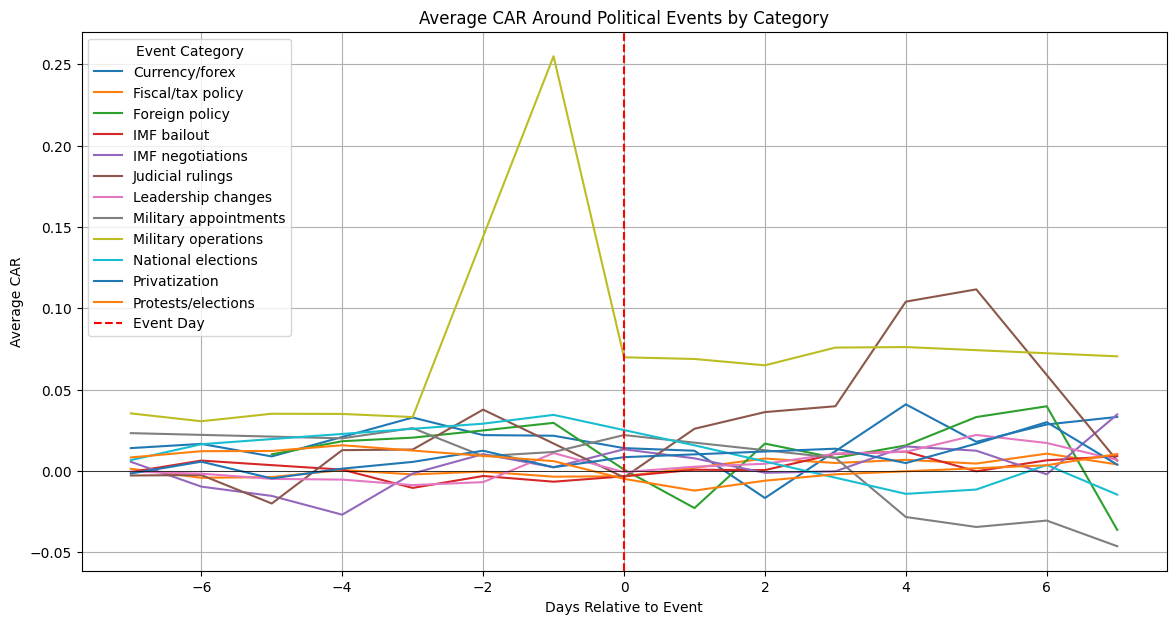

In [ ]:
# prompt: our next step is to Compare Event Categories

# STEP 8: Compare Event Categories
# We will analyze the average CAR for different categories of events.
# This requires having a 'Category' column in the event_df DataFrame.

if not event_df.empty and 'Category' in event_df.columns:
    # Calculate the average CAR for each category and each day
    average_car_by_category = event_df.groupby(['Category', 'Days_From_Event'])['CAR'].mean().reset_index()

    # Get unique categories for plotting
    categories = average_car_by_category['Category'].unique()

    plt.figure(figsize=(14, 7))

    # Plot CAR for each category
    for category in categories:
        category_data = average_car_by_category[average_car_by_category['Category'] == category]
        sns.lineplot(x='Days_From_Event', y='CAR', data=category_data, label=category)

    plt.title('Average CAR Around Political Events by Category')
    plt.xlabel('Days Relative to Event')
    plt.ylabel('Average CAR')
    plt.grid(True)
    plt.axvline(x=0, color='r', linestyle='--', label='Event Day') # Add a vertical line at the event day
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5) # Add line at 0 CAR
    plt.legend(title='Event Category')
    plt.show()

else:
    print("Cannot compare event categories because event_df is empty or does not contain a 'Category' column.")

# Further analysis could involve statistical tests to see if the average CAR for different categories is significantly different on specific days.


In [ ]:
# prompt: our next move is to view top and bottom events by CAR

# STEP 9: Identify Top and Bottom Events by CAR
# We will look at the CAR at the end of the event window (post_window day)
# to find which individual events had the most positive and negative cumulative returns.

if not event_df.empty:
    # Get the CAR value at the last day of the post-event window for each event
    end_of_window_car = event_df[event_df['Days_From_Event'] == post_window].copy()

    if not end_of_window_car.empty:
        # Sort to find top and bottom CAR events
        top_events = end_of_window_car.sort_values(by='CAR', ascending=False).head(10) # Top 10 events by CAR
        bottom_events = end_of_window_car.sort_values(by='CAR', ascending=True).head(10) # Bottom 10 events by CAR

        print(f"\nTop {len(top_events)} Events by CAR at Day +{post_window}:")
        print(top_events[['Event Date', 'Event Title', 'CAR']].to_string(index=False))

        print(f"\nBottom {len(bottom_events)} Events by CAR at Day +{post_window}:")
        print(bottom_events[['Event Date', 'Event Title', 'CAR']].to_string(index=False))
    else:
        print(f"No data available for the end of the window (Day +{post_window}). Please check your window definition and data availability.")

else:
    print("Cannot identify top/bottom events because event_df is empty.")


Top 10 Events by CAR at Day +7:
Event Date                                Event Title      CAR
2024-01-08 Military Strikes in Iran Escalate Tensions 0.070476
2023-10-26              Rupee Depreciation to 300/USD 0.063590
2024-11-15                  Policy Rate Hike to 21.5% 0.055820
2024-05-13                   Policy Rate Cut to 20.5% 0.043519
2024-04-11         New IMF Program Negotiations Begin 0.036975
2023-07-20      IMF Approves $3B Stand-By Arrangement 0.033945
2022-11-03      IMF Tranche Delay Over Fiscal Targets 0.032561
2022-09-30      Privatization Plan for SOEs Announced 0.028210
2024-03-20             Coalition Government Formation 0.026939
2022-01-28                  Policy Rate Hike to 9.75% 0.024011

Bottom 10 Events by CAR at Day +7:
Event Date                                 Event Title       CAR
2022-12-16     Mini-Budget Imposing Rs. 170B New Taxes -0.048064
2023-12-15               Appointment of New Army Chief -0.046246
2022-07-18        Pakistan Removed from FAT

In [ ]:
# prompt: next step is toview average CAR by category

# View average CAR by category
if not event_df.empty and 'Category' in event_df.columns:
    # Calculate the average CAR for each category and each day
    average_car_by_category = event_df.groupby(['Category', 'Days_From_Event'])['CAR'].mean().reset_index()

    # Display the average CAR by category
    print("\nAverage Cumulative Abnormal Return (CAR) Around Political Events by Category:")
    print(average_car_by_category)

else:
    print("Cannot view average CAR by category because event_df is empty or does not contain a 'Category' column.")


Average Cumulative Abnormal Return (CAR) Around Political Events by Category:
               Category  Days_From_Event       CAR
0        Currency/forex               -7  0.014067
1        Currency/forex               -6  0.016653
2        Currency/forex               -5  0.008951
3        Currency/forex               -3  0.032851
4        Currency/forex               -2  0.022065
..                  ...              ...       ...
150  Protests/elections                1 -0.012059
151  Protests/elections                2 -0.005956
152  Protests/elections                3 -0.002037
153  Protests/elections                6  0.003527
154  Protests/elections                7  0.010426

[155 rows x 3 columns]


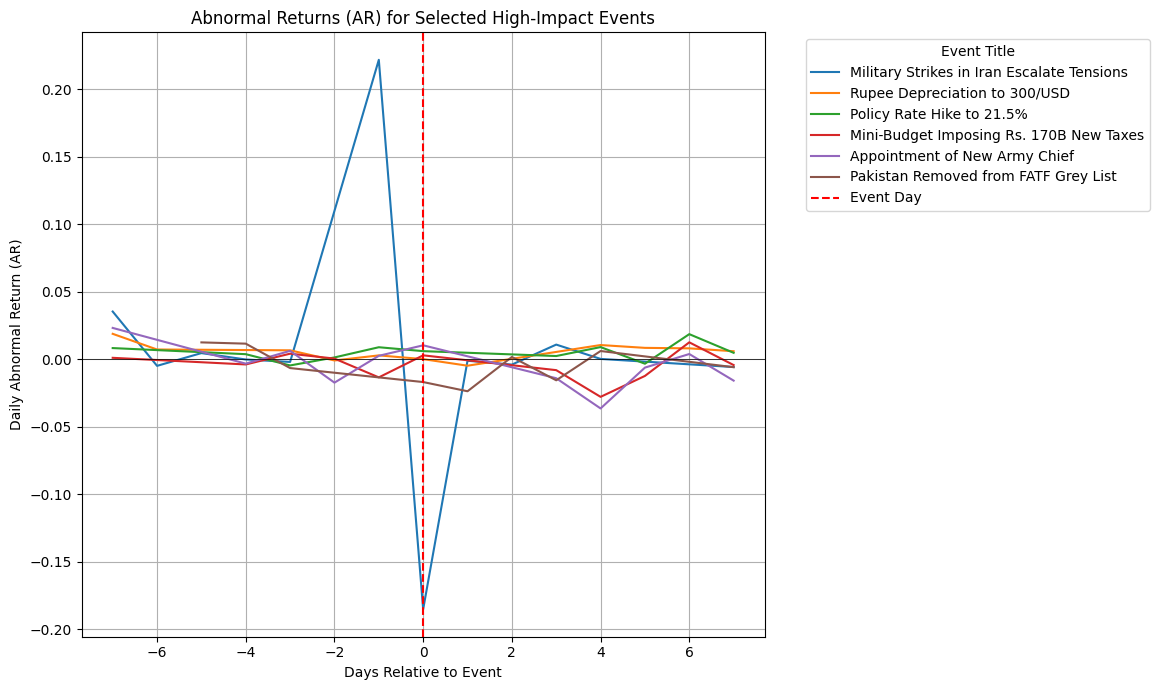

In [ ]:
# prompt: our final results is to Plot AAR for a Few High-Impact Events

# **Plot AAR for a Few High-Impact Events**

# STEP 10: Plot AAR for a Few High-Impact Events
# We can select a few events identified as having high positive or negative CAR
# and plot their individual Abnormal Returns (AR) over the event window.

if not event_df.empty:
    # Get a list of high-impact event titles (e.g., from the top/bottom events identified earlier)
    # For demonstration, let's pick the top 3 and bottom 3 events based on CAR at the end of the window.
    if 'top_events' in locals() and 'bottom_events' in locals() and not top_events.empty and not bottom_events.empty:
        high_impact_event_titles = pd.concat([top_events['Event Title'].head(3), bottom_events['Event Title'].head(3)]).unique()
    elif not event_df.empty and 'CAR' in event_df.columns:
         # If top/bottom events weren't calculated or were empty, fall back to events with extreme CAR values
         # This is less precise than using the end-of-window CAR but provides a list if needed.
         extreme_car_events = event_df[event_df['Days_From_Event'] == post_window].sort_values(by='CAR', ascending=False)
         if not extreme_car_events.empty:
             high_impact_event_titles = pd.concat([extreme_car_events['Event Title'].head(3), extreme_car_events['Event Title'].tail(3)]).unique()
         else:
             high_impact_event_titles = [] # No events to plot
    else:
        high_impact_event_titles = [] # No events to plot


    if high_impact_event_titles.size > 0:
        # Filter event_df to include only the high-impact events
        high_impact_events_data = event_df[event_df['Event Title'].isin(high_impact_event_titles)].copy()

        if not high_impact_events_data.empty:
            plt.figure(figsize=(14, 7))

            # Plot AR for each high-impact event
            for title in high_impact_event_titles:
                event_data = high_impact_events_data[high_impact_events_data['Event Title'] == title]
                if not event_data.empty:
                     sns.lineplot(x='Days_From_Event', y='Abnormal_Return', data=event_data, label=title)
                else:
                     print(f"No data found for event: {title}")


            plt.title('Abnormal Returns (AR) for Selected High-Impact Events')
            plt.xlabel('Days Relative to Event')
            plt.ylabel('Daily Abnormal Return (AR)')
            plt.grid(True)
            plt.axvline(x=0, color='r', linestyle='--', label='Event Day') # Add a vertical line at the event day
            plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5) # Add line at 0 AR
            plt.legend(title='Event Title', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside plot
            plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
            plt.show()
        else:
             print("No data available for the selected high-impact events.")

    else:
        print("No high-impact events identified to plot.")

else:
    print("Cannot plot AAR for specific events because event_df is empty.")